In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
# Read in inbuilt dataset tips
tips = sns.load_dataset('tips')

#  Setting the style and color palette

This is one of the most important but also tricky things to do with Seaborn
I found something that worked for me once and have stuck with it and suggest you do the same

In [32]:
# set_style: possible options 'white', 'dark', 'whitegrid', 'darkgrid' or 'ticks'
# can inspect sns.axes_style()
# change the individual parameters using { parameter : new value} inside the brackets
sns.set_style("darkgrid")
# set_palette
sns.set_palette('tab10', 10)
# set_context possible contexts are 'notebook', 'paper', 'talk', 'poster' they change size of font to make more visible
# can inspect sns.plotting_context()
# change the individual parameters using { parameter : new value} inside the brackets
sns.set_context('talk')

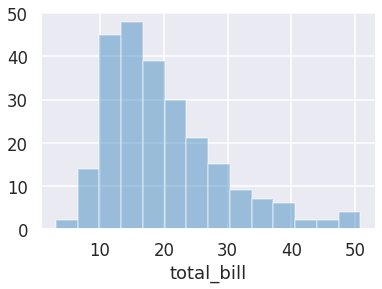

In [33]:
# An example of a typical graph
tips = sns.load_dataset('tips')
sns.distplot(tips['total_bill'], kde=False)

### https://seaborn.pydata.org/tutorial/color_palettes.html
### https://xkcd.com/color/rgb/

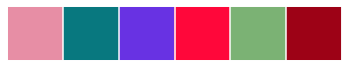

In [5]:
# To create your own colour pallete
colors = ["pig pink", "deep aqua", "burple", "neon red", "faded green", "carmine", ]
sns.palplot(sns.xkcd_palette(colors))
# to set as default
# sns.set_palette(sns.xkcd_palette(colors), 10)

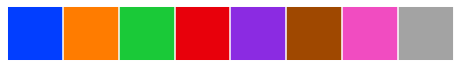

In [6]:
# Default colour palette has 6 versions: deep, muted, pastel, bright, dark, and colorblind
sns.palplot(sns.color_palette("bright", 8))

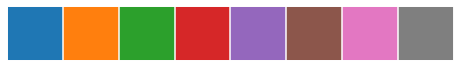

In [7]:
sns.palplot(sns.color_palette("tab10", 8))

In [8]:
sns.axes_style();

# Now for some data

In [9]:
# Reading in the inbuild dataset
tips = sns.load_dataset('tips')

In [10]:
# How big is the tips dataset?
tips.shape

(244, 7)

In [11]:
# What does the dataset look like
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# sns.distplot - for continuous univariate data, histograms and distributions

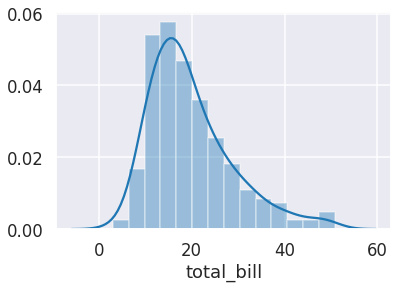

In [12]:
# Showing the distribution of the total bill column - what are the issues with this simple plot?
sns.distplot(tips['total_bill'])

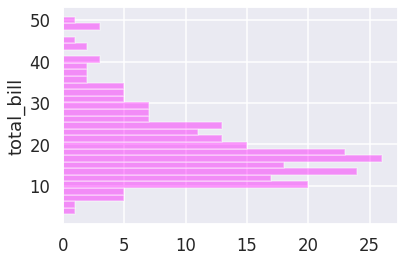

In [13]:
# Setting kde as False removes the smoothing line but gives a more familiar y axis.
# bins allows you to choose the number of bars in the histogram depending on the amount of detail required
# rug is not very exciting imho, not really sure the value it adds
sns.distplot(tips['total_bill'], kde=False, bins = 30, rug=False, color='magenta', vertical=True)

# WHAT'S THE PROBLEM HERE?

# sns.lineplot - for plotting one or more lines of continuous data
As with matplotlib we can also plot lines although this dataset does not lend itself so well, not having an independent variable but we can demonstrate with the index

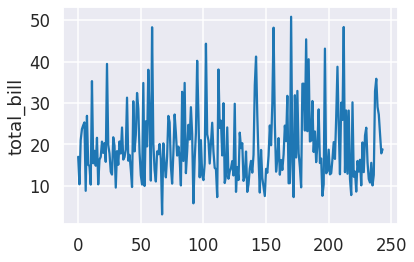

In [14]:
# One line quick lineplot
sns.lineplot(tips.index, tips.total_bill)

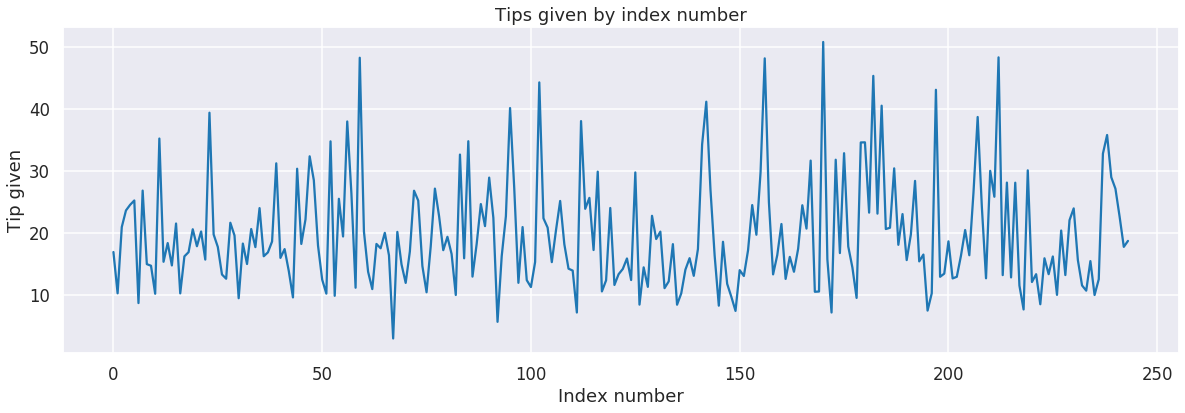

In [15]:
# customised lineplot using matplotlib methods
# This could also be done using 'ax' instead of plot but you would need to type ax.set_xlabel, ax.set_title etc
fig, ax = plt.subplots(figsize =(20, 6))
sns.lineplot(tips.index, tips.total_bill)
# Can plot multiple columns on the same axis
# sns.lineplot(tips.index, tips.total_bill)
plt.xlabel('Index number')
plt.ylabel('Tip given')
plt.title('Tips given by index number')
plt.show()

### We can add different variables (columns by simply adding another sns.lineplot..... line)
### We can break up existing variable by categories using hue=   see below

## Bivariate continuous data
These are essentially different types of scatter plot but each has its own features. Lets plot total bill against tip and explore

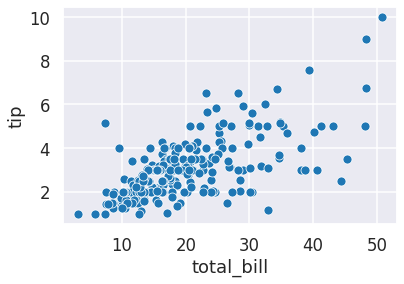

In [16]:
# Using simple quick start sns.scatterplot(x, y) notation:
sns.scatterplot(tips.total_bill, tips.tip)

## Introducing a third dimension
By changing the format from __plot(x,y) to __plot('x', 'y', data = dataframe) we can do more

Combine with matplotlib functions for more control

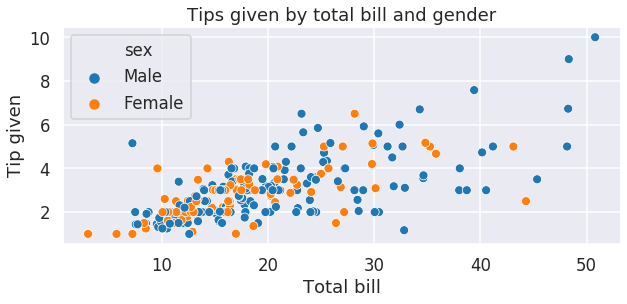

In [17]:
# Using hue to differentiate between make and female tippers
fig, ax = plt.subplots(figsize =(10, 4))
sns.scatterplot('total_bill', 'tip', hue = 'sex', data = tips)
plt.xlabel('Total bill')
plt.ylabel('Tip given')
plt.title('Tips given by total bill and gender')
plt.show()

## sns.regplot - like scatterplot but includes a REGression line (line of best fit) by default

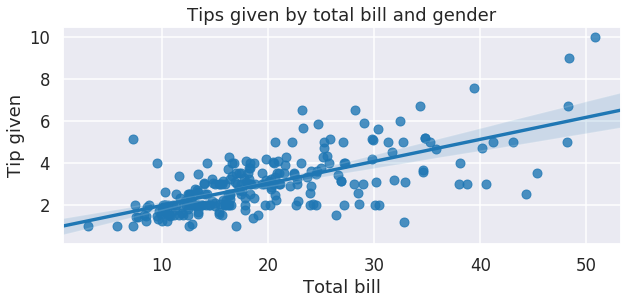

In [18]:
# Using hue to differentiate between make and female tippers
fig = plt.subplots(figsize =(10, 4))
sns.regplot('total_bill', 'tip', data = tips)
plt.xlabel('Total bill')
plt.ylabel('Tip given')
plt.title('Tips given by total bill and gender')
plt.show();

# Categorical data

For analysing data where the values are not continuous and are their strings of text, binary yes or no, male or female, cat or dog or ratings, say 1,2,3,4 or 5

## sns.countplot - for looking at frequencies in individual columns

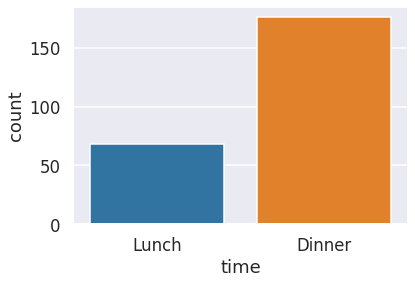

In [19]:
# ONly requirement for this simple plot is that all values are in the same column - .melt() can help achieve this
sns.countplot(tips.time)

## sns.barplot - allows more complex categorical plotting than simple countplot

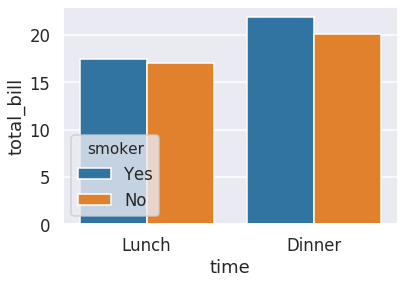

In [20]:
sns.barplot('time', 'total_bill', hue='smoker', data=tips, ci=False)   # add ,hue='smoker'

## sns.boxplot - allows us to see the distribution of values in a range of categories

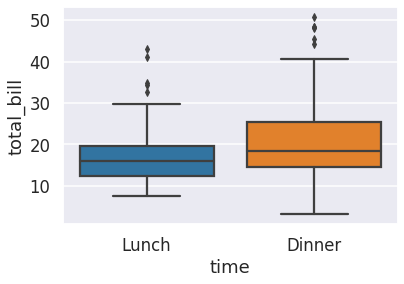

In [21]:
sns.boxplot( 'time','total_bill', data=tips)   # use hue to add another categorical variable

# two ways to change orietnation 1. switch x and y  2. use orient='h'

## sns.violinplot - like a boxplot but shows frequency using width rather than just median IQR etc

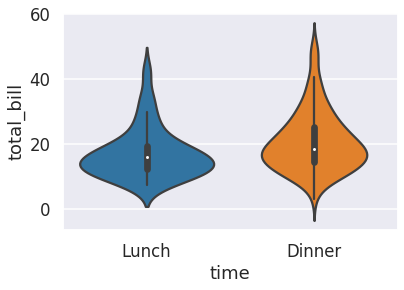

In [22]:
sns.violinplot( 'time','total_bill', data=tips) # add  hue='smoker',

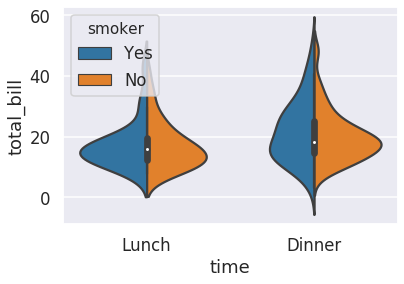

In [23]:
sns.violinplot( 'time','total_bill', hue='smoker', data=tips, split=True) 

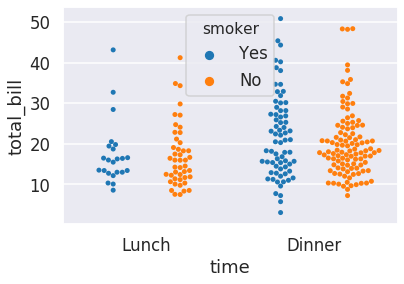

In [24]:
sns.swarmplot(x="time", y="total_bill",hue='smoker',data=tips, dodge=True) # add in split=True

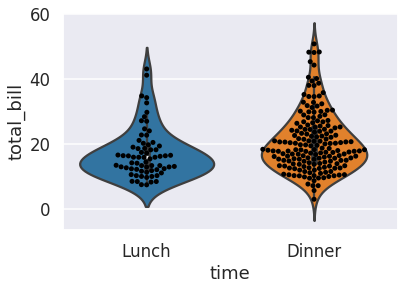

In [25]:
# Combining plots for greater detail or effect
sns.violinplot( 'time','total_bill', data=tips) # add in split=True
sns.swarmplot(x="time", y="total_bill",data=tips, color='black') # add in split=True

# More advanced plots
These plots generate their own axes so cannot be used with the fig, ax =plt.subplots() approach

## sns.lmplot - another scatterplot but allows more categorical analysis

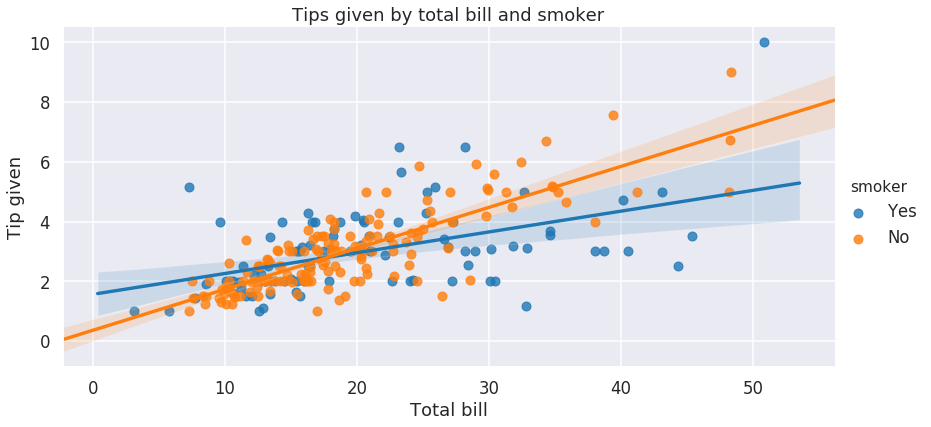

In [26]:
# Using hue to differentiate between make and female tippers
# use height to specify height of plot and aspec to specify ration of width tho height in theis case 2 means width = 6X2
g = sns.lmplot('total_bill', 'tip', hue='smoker', data = tips, height=6, aspect = 2)
plt.xlabel('Total bill')
plt.ylabel('Tip given')
plt.title('Tips given by total bill and smoker')
plt.show()

## See documentation for how to change axes, labels, titles etc

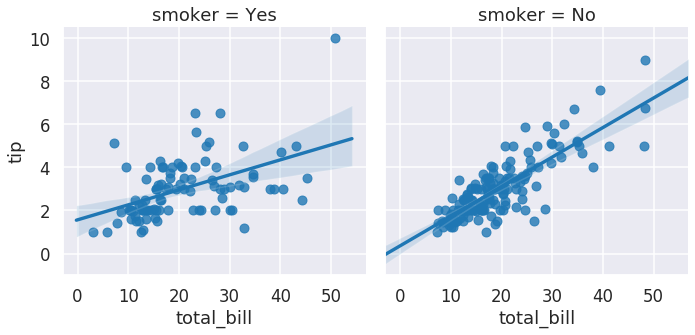

In [27]:
g = sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

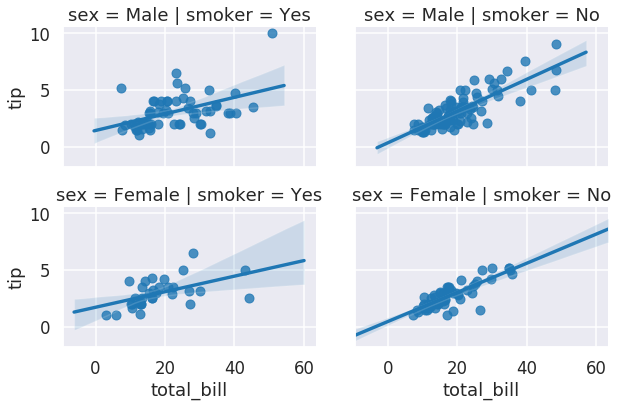

In [28]:
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="smoker", data=tips, height=3, aspect = 1.5)

## sns.pairplot - reveals relationships between multiple numerical data pairs

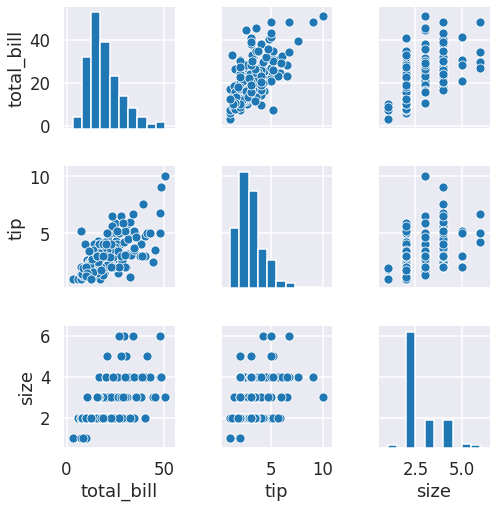

In [29]:
sns.pairplot(tips)

In [ ]:
# This can be modified by adding hue='category' for the category of your choice. bar histograms then become kde for easy comparison